In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import pandas as pd
import plotly.offline as plo
import plotly.graph_objs as go 
import cufflinks as cf

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

In [4]:
df=pd.read_csv("train.csv")

In [5]:
pd.set_option("display.max_columns",1000)

In [6]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [165]:
df.shape

(233154, 47)

In [7]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### Disbursed Amount

#### Univariate Anlaysis

In [8]:
df["disbursed_amount"].describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

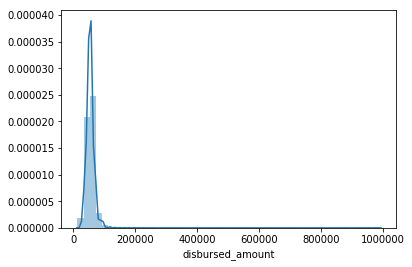

In [9]:
sns.distplot(df["disbursed_amount"])

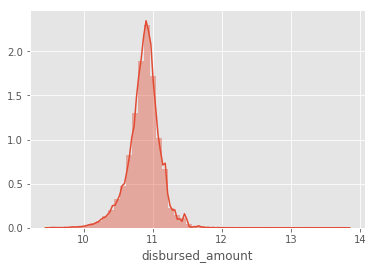

In [166]:
sns.distplot(np.log(df["disbursed_amount"]))

In [10]:
print(df["disbursed_amount"].skew())

4.4922396638902455


In [11]:
print(df["disbursed_amount"].kurt())

249.9892735051841


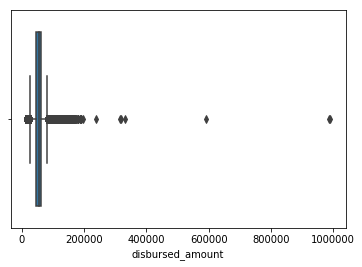

In [12]:
sns.boxplot(df["disbursed_amount"])

## Loan to value ratio

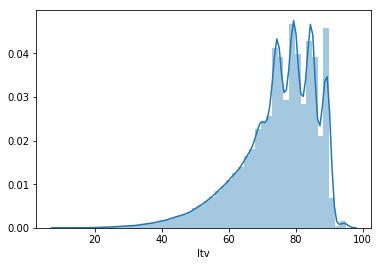

In [13]:
sns.distplot(df["ltv"])
plt.show()

In [14]:
loan_0=df[df["loan_default"]==0]
loan_1=df[df["loan_default"]==1]

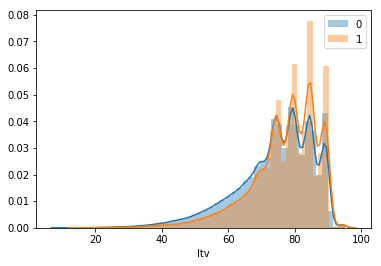

In [15]:
sns.distplot(loan_0["ltv"])
sns.distplot(loan_1["ltv"])
plt.legend([0,1])
plt.show()

### higher the ltv,There are chances of getting defaulted.

In [16]:
from scipy.stats import ttest_ind

### H0:Mean_of_0==Mean_of_1 
### H1:Mean_of_0!=Mean_of_1

In [17]:
ttest_ind(loan_0["ltv"],loan_1["ltv"])

Ttest_indResult(statistic=-47.65077542766104, pvalue=0.0)

In [18]:
df.groupby("loan_default").mean()["ltv"]

loan_default
0    74.154093
1    76.883322
Name: ltv, dtype: float64

### p-value less than .05 it failed to reject the null hypothesis which shows it is significant variable in spitting target variable.

## asset_cost

### This is the orginal price of the vehicle from which depreceated value can be calculated over the course of its useful life 

In [19]:
df["asset_cost"].describe()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: asset_cost, dtype: float64

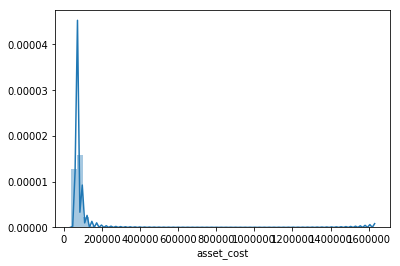

In [20]:
sns.distplot(df["asset_cost"])

In [21]:
print(df["asset_cost"].skew())

6.133485335511084


In [22]:
print(df["asset_cost"].kurt())

291.49393926915474


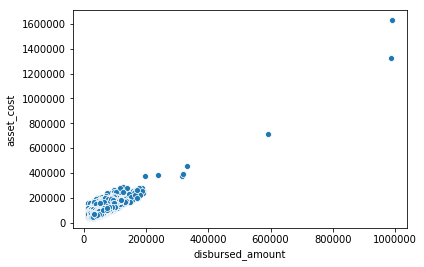

In [23]:
sns.scatterplot(df["disbursed_amount"],df["asset_cost"])

In [24]:
df[["disbursed_amount","asset_cost"]].corr()

,disbursed_amount,asset_cost
disbursed_amount,1.000000,0.752668
asset_cost,0.752668,1.000000


### Disbursed amount and asset cost seems to be positively correlated which is seen in both scatterplot as well as in correlation table.

### H0:Mean_of_0==Mean_of_1 
### H1:Mean_of_0!=Mean_of_1

In [25]:
ttest_ind(loan_0["asset_cost"],loan_1["asset_cost"])

Ttest_indResult(statistic=-6.886906209368185, pvalue=5.716223071536896e-12)

In [26]:
df.groupby("loan_default").mean()["asset_cost"]

loan_default
0    75722.806128
1    76378.176661
Name: asset_cost, dtype: float64

### p-value less than .05 it failed to reject the null hypothesis which shows it is significant variable in spitting target variable.

### Branch_id

In [27]:
df["branch_id"].nunique()

82

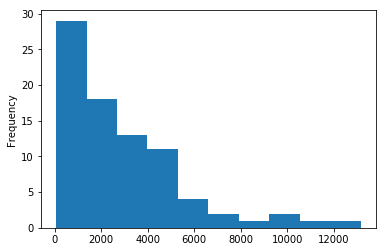

In [28]:
df["branch_id"].value_counts().plot.hist()

In [29]:
#comparison with target variable:
com_df=pd.crosstab(df["branch_id"],df["loan_default"],normalize="index")

In [168]:
com_df.sort_values(1,ascending=False)

loan_default,0,1
manufacturer_id,,
153,0.666667,0.333333
48,0.727469,0.272531
45,0.771501,0.228499
120,0.779250,0.220750
49,0.781213,0.218787
67,0.782536,0.217464
51,0.792053,0.207947
86,0.795406,0.204594
145,0.799486,0.200514


In [30]:
plt.style.use("ggplot")

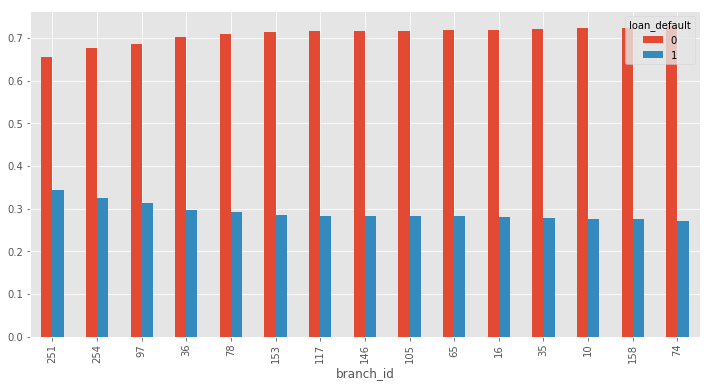

In [31]:
#plt.figure(figsize=(14,7))
com_df.sort_values(1,ascending=False)[:15].plot.bar(figsize=(12,6))
plt.show()

### These branches have highest number of defaulters`

### H0-There is no siginificant relationship between the branches and no_of_defaulters
### H1-There is  siginificant relationship between the branches and no_of_defaulters

In [32]:
from scipy.stats import chi2_contingency

In [174]:
conti_table=pd.crosstab(df["branch_id"],df["loan_default"])

In [34]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [35]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2930.842784292354 p_value- 0.0


### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the branches and no_of_defaulters.

### manufacturer_id

In [36]:
df["manufacturer_id"].nunique()

11

In [37]:
#comparison with target variable:
com_df=pd.crosstab(df["manufacturer_id"],df["loan_default"],normalize="index")

In [38]:
com_df.sort_values(1,ascending=False)

loan_default,0,1
manufacturer_id,,
153,0.666667,0.333333
48,0.727469,0.272531
45,0.771501,0.228499
120,0.779250,0.220750
49,0.781213,0.218787
67,0.782536,0.217464
51,0.792053,0.207947
86,0.795406,0.204594
145,0.799486,0.200514


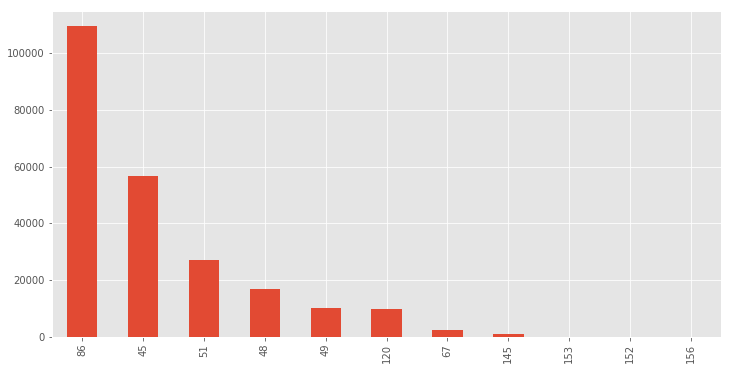

In [39]:
df["manufacturer_id"].value_counts().plot.bar(figsize=(12,6))

###  Top 2 players in this market seems to have huge market share with them

### H0-There is no siginificant relationship between the manufacturer and no_of_defaulters
### H1-There is  siginificant relationship between the manufacturer and no_of_defaulters

In [40]:
from scipy.stats import chi2_contingency

In [41]:
conti_table=pd.crosstab(df["manufacturer_id"],df["loan_default"])

In [42]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [43]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 464.69764016358414 p_value- 1.5277380091688753e-93


### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the manufactuers and no_of_defaulters.

### Current_pincode_ID

In [44]:
df["Current_pincode_ID"].nunique()

6698

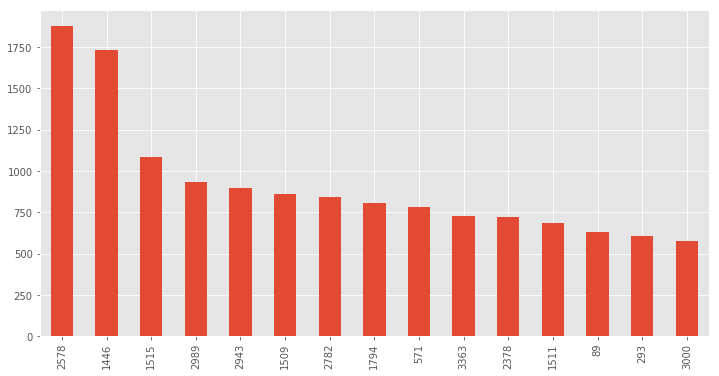

In [45]:
df["Current_pincode_ID"].value_counts()[:15].plot.bar(figsize=(12,6))

### H0-There is no siginificant relationship between the Pincodes and no_of_defaulters
### H1-There is  siginificant relationship between the Pincodes and no_of_defaulters

In [46]:
from scipy.stats import chi2_contingency

In [47]:
conti_table=pd.crosstab(df["Current_pincode_ID"],df["loan_default"])

In [48]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [49]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 12702.76993331368 p_value- 0.0


### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the Current pincode and no_of_defaulters.

### Date_of_Birth and Disbursal Date

In [50]:
df["DisbursalDate"][1]

'26-09-2018'

In [51]:
df["Date.of.Birth"]=pd.to_datetime(df["Date.of.Birth"],format="%d-%m-%Y")

In [52]:
df["DisbursalDate"]=pd.to_datetime(df["DisbursalDate"],format="%d-%m-%Y")

In [53]:
df["Age_at_time_of_disbursement"]=((df["DisbursalDate"]-df["Date.of.Birth"])/365).dt.days

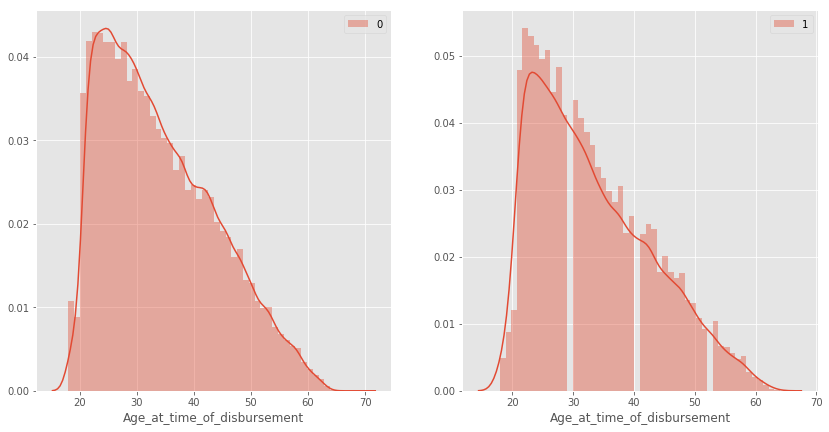

In [54]:
fig,ax=plt.subplots(1,2,figsize=(14,7))
sns.distplot(df[df["loan_default"]==0]["Age_at_time_of_disbursement"],ax=ax[0],label="0")
sns.distplot(df[df["loan_default"]==1]["Age_at_time_of_disbursement"],ax=ax[1],label="1")
ax[0].legend()
ax[1].legend()
plt.show()

In [55]:
df["loan_default"].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

### Both have same characteristic from the distplot.Let's do statistical test.

In [56]:
from scipy.stats import ttest_ind

In [57]:
age_of_0=df[df["loan_default"]==0]["Age_at_time_of_disbursement"]
age_of_1=df[df["loan_default"]==1]["Age_at_time_of_disbursement"]

### H0:mean_age_of_non_defaulters==mean_age_of_non_defaulters
### H1:mean_age_of_non_defaulters!=mean_age_of_non_defaulters

In [58]:
ttest_ind(age_of_0,age_of_1)

Ttest_indResult(statistic=17.65984940031283, pvalue=9.491681743180959e-70)

#### pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that mean age of both groups differ.

In [59]:
#df["year_of_disbursement"]=df["DisbursalDate"].dt.year
df["month_of_disbursement"]=df["DisbursalDate"].dt.month

In [60]:
df["month_of_disbursement"].unique()

array([ 8,  9, 10], dtype=int64)

In [61]:
conti_table=pd.crosstab(df["month_of_disbursement"],df["loan_default"])

In [62]:
conti_table

loan_default,0,1
month_of_disbursement,,
8,53336,14666
9,53973,12815
10,75234,23130


In [63]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [64]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 439.3615166880304 p_value- 3.925173615141533e-96


### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the  month and no_of_defaulters.

### Employment.Type

In [65]:
df["Employment.Type"].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [66]:
df.isnull().sum()[df.isnull().sum()>0]

Employment.Type    7661
dtype: int64

In [67]:
761*100/df.shape[0]

0.32639371402592277

#### There are 7661 null values in the column which is .32 of the total rows.So,replace them with mode

In [68]:
df["Employment.Type"]=df["Employment.Type"].fillna(df["Employment.Type"].mode()[0])

### State_id

22


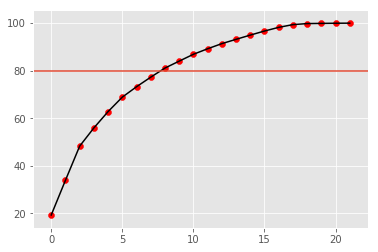

In [69]:
print(df["State_ID"].nunique())
state=df["State_ID"].value_counts()

state["percent"]=state*100/state.sum()

state["cumsum"]=state["percent"].cumsum()

plt.plot(state["cumsum"].values,"-",c="black")
plt.scatter(np.arange(0,22),state["cumsum"].values,c="r")
plt.axhline(80)

#### nearly seven states contribute to 80 percent of the customers

### H0-There is no siginificant relationship between the Pincodes and no_of_defaulters
### H1-There is  siginificant relationship between the Pincodes and no_of_defaulters

In [177]:
conti_table=pd.crosstab(df["State_ID"],df["loan_default"])

In [178]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [179]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 1626.8617814468685 p_value- 0.0


In [180]:
chi

21

In [176]:
from scipy.stats import chi2

In [ ]:
chi2()

### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the State_id and no_of_defaulters.

### PERFORM_CNS.SCORE

In [73]:
df["PERFORM_CNS.SCORE"].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [74]:
group_0=df[df["loan_default"]==0]
group_1=df[df["loan_default"]==1]

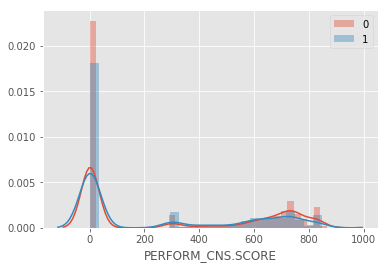

In [75]:
sns.distplot(group_0["PERFORM_CNS.SCORE"])
sns.distplot(group_1["PERFORM_CNS.SCORE"])
plt.legend([0,1])
plt.show()

In [76]:
group_0["PERFORM_CNS.SCORE"].describe()

count    182543.000000
mean        299.784270
std         342.883794
min           0.000000
25%           0.000000
50%          15.000000
75%         690.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [77]:
group_1["PERFORM_CNS.SCORE"].describe()

count    50611.000000
mean       252.236372
std        318.826242
min          0.000000
25%          0.000000
50%          0.000000
75%        610.000000
max        879.000000
Name: PERFORM_CNS.SCORE, dtype: float64

### Nearly 50% of the customers in the defaulter's list have cns score of zero

### H0:mean_CNS_Score_of_non_defaulters==mean_CNS_Score_of_non_defaulters
### H1:mean_CNS_Score_of_non_defaulters!=mean_CNS_Score_of_non_defaulters

In [78]:
ttest_ind(group_0["PERFORM_CNS.SCORE"],group_1["PERFORM_CNS.SCORE"])

Ttest_indResult(statistic=28.018568872971258, pvalue=1.869421119257312e-172)

#### pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that CNS score of both groups differ.

### PERFORM_CNS.SCORE.DESCRIPTION

In [79]:
df["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [169]:
df.groupby("PERFORM_CNS.SCORE.DESCRIPTION").agg({"PERFORM_CNS.SCORE":["mean","min","max"]})

PERFORM_CNS.SCORE          
                                           mean  min  max
PERFORM_CNS.SCORE.DESCRIPTION                            
A-Very Low Risk                      827.662631  806  890
B-Very Low Risk                      774.183893  761  805
C-Very Low Risk                      741.899221  736  760
D-Very Low Risk                      715.958091  706  735
E-Low Risk                           691.517437  681  705
F-Low Risk                           666.064467  651  680
G-Low Risk                           640.853561  631  650
H-Medium Risk                        617.031947  601  630
I-Medium Risk                        586.832644  571  600
J-High Risk                          549.876734  521  570
K-High Risk                          440.594177  351  520
L-Very High Risk                     326.601411  301  350
M-Very High Risk                     300.000000  300  300
No_Score                               1.590076    0   18

In [80]:
val=['No Bureau History Available','Not Scored: Not Enough Info available on the customer',
    'Not Scored: No Activity seen on the customer (Inactive)','Not Scored: Sufficient History Not Available',
    'Not Scored: No Updates available in last 36 months','Not Scored: More than 50 active Accounts found','Not Scored: Only a Guarantor']

In [81]:
for i in val:
    df["PERFORM_CNS.SCORE.DESCRIPTION"]=df["PERFORM_CNS.SCORE.DESCRIPTION"].replace({i:"No_Score"})

In [82]:
pd.crosstab(df["PERFORM_CNS.SCORE.DESCRIPTION"],df["loan_default"],normalize="index").sort_values(1,ascending=False)

loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION,,
M-Very High Risk,0.695419,0.304581
L-Very High Risk,0.719577,0.280423
K-High Risk,0.721880,0.278120
I-Medium Risk,0.727371,0.272629
J-High Risk,0.747599,0.252401
H-Medium Risk,0.758133,0.241867
No_Score,0.770274,0.229726
G-Low Risk,0.802909,0.197091
F-Low Risk,0.813789,0.186211


#### This column looks like a ordinal data.However,the No_score inspite of being not scored has relatively low percent of defaulters than high risk people

In [83]:
#creating a column whether they are scored are not
df["Scored_Or_Not"]=df["PERFORM_CNS.SCORE.DESCRIPTION"].apply(lambda x:1 if x=="No_Score" else 0)

### H0-There is no siginificant relationship between the CNS.desc and no_of_defaulters
### H1-There is  siginificant relationship between the CNS.desc and no_of_defaulters

In [84]:
conti_table=pd.crosstab(df["PERFORM_CNS.SCORE.DESCRIPTION"],df["loan_default"])

In [85]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [86]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2114.4654081820345 p_value- 0.0


### P_value less than .05 which rejects null hypotheis in favour of alternate hypothesis.There is significant relationship between the CNS.desc and no_of_defaulters.

#### with p_value exactly zero this seems important variable.

### PRI.NO.OF.ACCTS

In [87]:
df["PRI.NO.OF.ACCTS"].describe()

count    233154.000000
mean          2.440636
std           5.217233
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI.NO.OF.ACCTS, dtype: float64

#### with over 50% of people have No loan accounts before

In [88]:
df["PRI.NO.OF.ACCTS"].value_counts().head()

0    116950
1     34978
2     19784
3     13015
4      9323
Name: PRI.NO.OF.ACCTS, dtype: int64

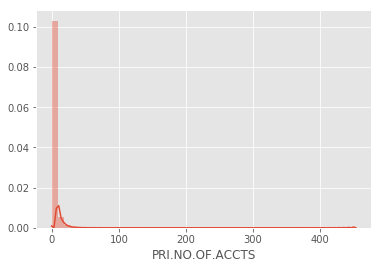

In [89]:
sns.distplot(df['PRI.NO.OF.ACCTS'])

In [90]:
df["First_Time_Account_Holder"]=df["PRI.NO.OF.ACCTS"].apply(lambda x:1 if x==0 else 0)

In [91]:
conti_table=pd.crosstab(df["First_Time_Account_Holder"],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the First_Time_Account_Holder and no_of_defaulters
### H1-There is  siginificant relationship between the First_Time_Account_Holder and no_of_defaulters

In [92]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [93]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2.7767129608850434 p_value- 0.0956442825239546


#### With p_value less than .05 it fails to reject null hypothesis which stats that there is no significant relationship between first time account holders and no_of_defaulters

### PRI.ACTIVE.ACCTS

In [94]:
df["PRI.ACTIVE.ACCTS"].describe()

count    233154.000000
mean          1.039896
std           1.941496
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         144.000000
Name: PRI.ACTIVE.ACCTS, dtype: float64

#### here also over 50% people have no active accounts 

In [95]:
df["Active_accounts_Flag"]=df["PRI.ACTIVE.ACCTS"].apply(lambda x:0 if x==0 else 1)

In [96]:
conti_table=pd.crosstab(df["Active_accounts_Flag"],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the Active_Accounts_Flag and no_of_defaulters
### H1-There is  siginificant relationship between the Active_Accounts_Flag and no_of_defaulters

In [97]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [98]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2.826471242613229 p_value- 0.09272189051920196


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between Active aaccounts flag and no_of_defaulters

### PRI.OVERDUE.ACCTS

In [99]:
df["PRI.OVERDUE.ACCTS"].describe()

count    233154.000000
mean          0.156549
std           0.548787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI.OVERDUE.ACCTS, dtype: float64

In [100]:
df["PRI.OVERDUE.ACCTS"].value_counts()

0     206879
1      19970
2       4302
3       1202
4        404
5        166
6         96
7         38
8         27
9         25
11        12
12         8
10         6
13         5
14         5
17         2
18         2
23         1
15         1
16         1
19         1
25         1
Name: PRI.OVERDUE.ACCTS, dtype: int64

#### only around 25000 people have overdue accounts

In [101]:
df["Overdue_accounts_Flag"]=df["PRI.OVERDUE.ACCTS"].apply(lambda x:0 if x==0 else 1)

In [102]:
conti_table=pd.crosstab(df["Overdue_accounts_Flag"],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the Overdue_accounts_Flag and no_of_defaulters
### H1-There is  siginificant relationship between the Overdue_accounts_Flag and no_of_defaulters

In [103]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [104]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2.386531795177552 p_value- 0.12238487774028094


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between Overdue aaccounts flag and no_of_defaulters

### PRI.CURRENT.BALANCE

In [105]:
df["PRI.CURRENT.BALANCE"].describe()

count    2.331540e+05
mean     1.659001e+05
std      9.422736e+05
min     -6.678296e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.500650e+04
max      9.652492e+07
Name: PRI.CURRENT.BALANCE, dtype: float64

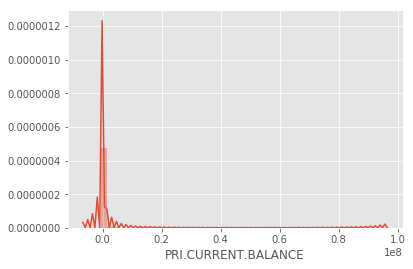

In [106]:
sns.distplot(df["PRI.CURRENT.BALANCE"])

#### There are some values less than zero which doesn't seem right

### PRI.SANCTIONED.AMOUNT AND PRI.DISBURSED.AMOUNT

In [107]:
df["PRI.SANCTIONED.AMOUNT"].describe()

count    2.331540e+05
mean     2.185039e+05
std      2.374794e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.250000e+04
max      1.000000e+09
Name: PRI.SANCTIONED.AMOUNT, dtype: float64

In [108]:
df["PRI.DISBURSED.AMOUNT"].describe()

count    2.331540e+05
mean     2.180659e+05
std      2.377744e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.080000e+04
max      1.000000e+09
Name: PRI.DISBURSED.AMOUNT, dtype: float64

#### both feature seems to have same characteristic

In [109]:
from scipy.stats import zscore

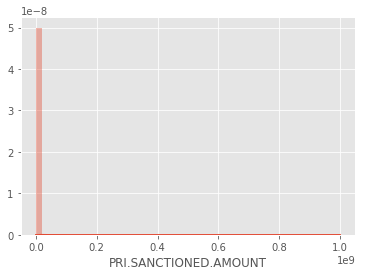

In [110]:
sns.distplot(df["PRI.SANCTIONED.AMOUNT"])

In [170]:
df[['PRI.SANCTIONED.AMOUNT','PRI.DISBURSED.AMOUNT']].corr()

,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
PRI.SANCTIONED.AMOUNT,1.000000,0.998747
PRI.DISBURSED.AMOUNT,0.998747,1.000000


In [111]:
df[df["PRI.SANCTIONED.AMOUNT"]==df["PRI.SANCTIONED.AMOUNT"].max()]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
71593,598208,47773,85964,59.33,20,16700,86,6434,1968-02-23,Self employed,2018-10-22,5,152,1,1,0,0,0,0,748,C-Very Low Risk,2,1,0,36041,1000000000,1000000000,0,0,0,0,0,0,0,0,0,0,2yrs 7mon,4yrs 2mon,0,1,50,10,0,0,1,0


#### His primary sanctioned amount is 100 crore while he had only two accounts before and his current disbursed amount seems to be less than 50000 which is two extremes.Eitherway we can't rule out.

In [112]:
ttest_ind(group_0["PRI.DISBURSED.AMOUNT"],group_1["PRI.DISBURSED.AMOUNT"])

Ttest_indResult(statistic=5.386857453201851, pvalue=7.176942237800462e-08)

In [113]:
ttest_ind(group_0["PRI.SANCTIONED.AMOUNT"],group_1["PRI.SANCTIONED.AMOUNT"])

Ttest_indResult(statistic=5.458812718452121, pvalue=4.798158421546997e-08)

#### both variables have p_values less than .05 which states that mean of both groups are not equal(both are significant features)

### SEC.NO.OF.ACCTS  SEC.ACTIVE.ACCTS SEC.OVERDUE.ACCTS

In [114]:
df["SEC.NO.OF.ACCTS"].value_counts().head()

0    227289
1      3466
2      1036
3       444
4       292
Name: SEC.NO.OF.ACCTS, dtype: int64

#### over 2 lakh people have no secondary accounts

In [115]:
conti_table=pd.crosstab(df['SEC.NO.OF.ACCTS'],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the SEC.NO.OF.ACCTS and no_of_defaulters
### H1-There is  siginificant relationship between the SEC.NO.OF.ACCTS and no_of_defaulters

In [116]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [117]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 6.0045936375142555 p_value- 0.9999999963867071


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.NO.OF.ACCTS  and no_of_defaulters

In [118]:
df["SEC.ACTIVE.ACCTS"].value_counts().head()

0    229337
1      2684
2       636
3       195
4       116
Name: SEC.ACTIVE.ACCTS, dtype: int64

In [119]:
conti_table=pd.crosstab(df['SEC.ACTIVE.ACCTS'],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the SEC.ACTIVE.ACCTS and no_of_defaulters
### H1-There is  siginificant relationship between the SEC.ACTIVE.ACCTS and no_of_defaulters

In [120]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [121]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 4.483899677775443 p_value- 0.9999765449816578


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.ACTIVE.ACCTS  and no_of_defaulters

In [122]:
df["SEC.OVERDUE.ACCTS"].value_counts().head()

0    231817
1      1129
2       126
3        47
4        19
Name: SEC.OVERDUE.ACCTS, dtype: int64

In [123]:
conti_table=pd.crosstab(df['SEC.OVERDUE.ACCTS'],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the SEC.OVERDUE.ACCTS and no_of_defaulters
### H1-There is  siginificant relationship between the SEC.OVERDUE.ACCTS and no_of_defaulters

In [124]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [125]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 0.7006247696945116 p_value- 0.9995250753555058


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between SEC.OVERDUE.ACCTS  and no_of_defaulters

### SEC.CURRENT.BALANCE SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT

In [126]:
df["SEC.CURRENT.BALANCE"].describe()

count    2.331540e+05
mean     5.427793e+03
std      1.702370e+05
min     -5.746470e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.603285e+07
Name: SEC.CURRENT.BALANCE, dtype: float64

In [127]:
df[df["SEC.CURRENT.BALANCE"]<0].head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
2548,461175,49763,73616,70.64,142,17315,86,109,1994-10-08,Salaried,2018-08-24,16,331,1,1,0,0,0,0,525,J-High Risk,9,5,1,96378,196500,196500,1,1,0,-30,100000,2239,2332,0,3,1,0yrs 10mon,2yrs 6mon,0,1,23,8,0,0,1,1
3657,577744,59259,77516,77.40,16,21498,86,2940,1984-07-21,Salaried,2018-10-14,17,430,1,1,0,0,0,0,585,I-Medium Risk,3,0,0,0,0,0,1,1,0,-76,156994,156994,0,0,0,0,3yrs 2mon,10yrs 7mon,0,1,34,10,0,0,0,0
13333,473381,26060,52674,52.51,3,16167,45,91,1963-02-26,Salaried,2018-08-29,1,630,1,1,0,0,0,0,610,H-Medium Risk,4,3,1,225759,539100,539100,1,1,0,-1,28964,28964,12319,0,0,0,2yrs 6mon,7yrs 0mon,0,0,55,8,0,0,1,1
18205,529513,39619,63084,67.37,160,15700,86,92,1968-05-01,Self employed,2018-09-23,16,1191,1,1,1,0,0,0,839,A-Very Low Risk,1,0,0,0,0,0,1,1,0,-24,5436,5436,0,0,1,0,1yrs 7mon,3yrs 2mon,0,0,50,9,0,0,0,0
19182,446097,23166,54340,45.09,160,14151,45,60,1983-01-12,Self employed,2018-08-17,1,1839,1,1,0,0,0,0,690,E-Low Risk,14,3,0,206000,518740,521684,1,1,0,-125,17000,17000,0,0,0,1,3yrs 2mon,12yrs 6mon,0,0,35,8,0,0,1,0


#### here also current balance have values less than zero

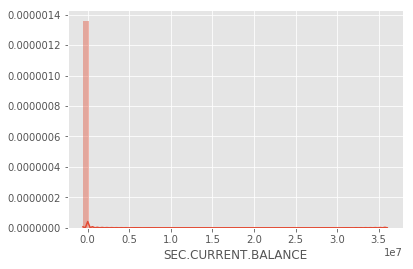

In [128]:
sns.distplot(df["SEC.CURRENT.BALANCE"])

In [129]:
ttest_ind(group_0["SEC.CURRENT.BALANCE"],group_1["SEC.CURRENT.BALANCE"])

Ttest_indResult(statistic=2.6709443833814404, pvalue=0.0075643427363124875)

In [130]:
ttest_ind(group_0["SEC.DISBURSED.AMOUNT"],group_1["SEC.DISBURSED.AMOUNT"])

Ttest_indResult(statistic=3.017101025367004, pvalue=0.0025523226185338705)

In [131]:
ttest_ind(group_0["SEC.SANCTIONED.AMOUNT"],group_1["SEC.SANCTIONED.AMOUNT"])

Ttest_indResult(statistic=3.068298386446011, pvalue=0.002153062273491789)

### PRIMARY.INSTAL.AMT SEC.INSTAL.AMT

In [132]:
df["PRIMARY.INSTAL.AMT"].describe()

count    2.331540e+05
mean     1.310548e+04
std      1.513679e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.999000e+03
max      2.564281e+07
Name: PRIMARY.INSTAL.AMT, dtype: float64

In [133]:
df["SEC.INSTAL.AMT"].describe()

count    2.331540e+05
mean     3.232684e+02
std      1.555369e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.170901e+06
Name: SEC.INSTAL.AMT, dtype: float64

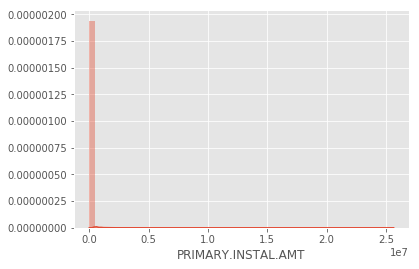

In [134]:
sns.distplot(df["PRIMARY.INSTAL.AMT"])

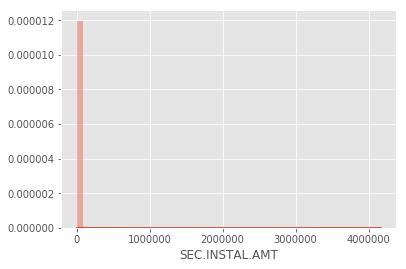

In [135]:
sns.distplot(df["SEC.INSTAL.AMT"])

### in both cases,we see abnormal max values.

In [136]:
df[df["PRIMARY.INSTAL.AMT"]==df["PRIMARY.INSTAL.AMT"].max()][["PRI.DISBURSED.AMOUNT","PRIMARY.INSTAL.AMT"]]

,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT
125308,1200000,25642806


#### how come primary install amt is greater than the primary disbursed amount.may be typo error which we should analyze

### H0:mean_emi_of_non_defaulters==mean_emi_of_non_defaulters
### H1:mean_emi_of_non_defaulters!=mean_emi_of_non_defaulters

In [139]:
ttest_ind(group_0["PRIMARY.INSTAL.AMT"],group_1["PRIMARY.INSTAL.AMT"])

Ttest_indResult(statistic=5.126237219178528, pvalue=2.958254960232989e-07)

#### pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that emi of both groups differ.

In [140]:
ttest_ind(group_0["SEC.INSTAL.AMT"],group_1["SEC.INSTAL.AMT"])

Ttest_indResult(statistic=0.7476974360618777, pvalue=0.4546434321302706)

#### pvalue greater than .05 it fails to reject which stats that mean of two groups are same (insignificant features)

### 'NEW.ACCTS.IN.LAST.SIX.MONTHS

In [143]:
df["NEW.ACCTS.IN.LAST.SIX.MONTHS"].value_counts().head()

0    181494
1     32099
2     11015
3      4458
4      1957
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [144]:
conti_table=pd.crosstab(df['NEW.ACCTS.IN.LAST.SIX.MONTHS'],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters
### H1-There is  siginificant relationship between the NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

In [145]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [146]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 6.8198968740511186 p_value- 0.9998828825427777


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   NEW.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

### DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS

In [147]:
df["DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS"].value_counts().head()

0    214959
1     14941
2      2470
3       537
4       138
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [148]:
conti_table=pd.crosstab(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'],df["loan_default"],normalize="index")

In [173]:
df[df["First_Time_Account_Holder"]==1].head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Age_at_time_of_disbursement,month_of_disbursement,Scored_Or_Not,First_Time_Account_Holder,Active_accounts_Flag,Overdue_accounts_Flag
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-08-03,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,34,8,1,1,0,0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-08-01,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,32,8,1,1,0,0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,1,1,40,9,1,1,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,2018-09-23,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,30,9,1,1,0,0
22,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,2018-10-08,6,1998,1,1,0,0,0,0,0,No_Score,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0,0,24,10,1,1,0,0


### H0-There is no siginificant relationship between the DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters
### H1-There is  siginificant relationship between the DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

In [149]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [150]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 2.28208875754001 p_value- 0.9995269170827656


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

### NO.OF_INQUIRIES

In [151]:
df["NO.OF_INQUIRIES"].value_counts().head()

0    201961
1     22285
2      5409
3      1767
4       760
Name: NO.OF_INQUIRIES, dtype: int64

In [152]:
conti_table=pd.crosstab(df['NO.OF_INQUIRIES'],df["loan_default"],normalize="index")

### H0-There is no siginificant relationship between the NO.OF_INQUIRIES and no_of_defaulters
### H1-There is  siginificant relationship between the NO.OF_INQUIRIES and no_of_defaulters

In [153]:
chi_2,p_value,dof,exp=chi2_contingency(conti_table)

In [154]:
print("chi_2-",chi_2,"p_value-",p_value)

chi_2- 4.777288778135122 p_value- 0.9999919312983875


#### This parameter also fails to reject null hypothesis which conveys there is no significant relationship between   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS and no_of_defaulters

### AVERAGE.ACCT.AGE

In [155]:
df["AVERAGE.ACCT.AGE"].describe()

count        233154
unique          192
top       0yrs 0mon
freq         119373
Name: AVERAGE.ACCT.AGE, dtype: object

In [160]:
df["AVERAGE.ACCT.AGE"]=df["AVERAGE.ACCT.AGE"].apply(lambda x:(int((x.split("y"))[0])*12)+(int((x.split())[1].split("m")[0])))

In [161]:
df["AVERAGE.ACCT.AGE"].describe()

count    233154.000000
mean          8.915764
std          15.106416
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max         369.000000
Name: AVERAGE.ACCT.AGE, dtype: float64

In [162]:
group_0=df[df["loan_default"]==0]
group_1=df[df["loan_default"]==1]

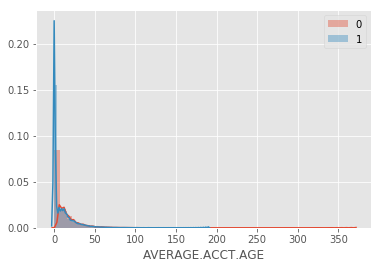

In [163]:
sns.distplot(group_0["AVERAGE.ACCT.AGE"])
sns.distplot(group_1["AVERAGE.ACCT.AGE"])
plt.legend([0,1])
plt.show()

### H0:mean_avg_age_of_non_defaulters==mean_avg_age_of_non_defaulters
### H1:mean_avg_age_of_non_defaulters!=mean_avg_age_of_non_defaulters

In [164]:
ttest_ind(group_0["AVERAGE.ACCT.AGE"],group_1["AVERAGE.ACCT.AGE"])

Ttest_indResult(statistic=11.969316978054646, pvalue=5.261091482095756e-33)

#### pvalue less than .05 which rejects null hypothesis in favour of alternate hypothesis that emi of both groups differ.

In [138]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'Age_at_time_of_disbursement', 'month_of_disbursement',
       'Scored_Or_Not', 'First_Time_Acco

In [181]:
from sklearn.feature_selection import chi2

In [186]:
a=chi2(df[['branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID']],df["loan_default"])

In [188]:
pd.DataFrame(a,columns=['branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID','State_ID'],index=["chi_2","p_value"]).T

,chi_2,p_value
branch_id,14212.508752,0.000000e+00
supplier_id,108342.654906,0.000000e+00
manufacturer_id,1038.158660,9.122256e-228
Current_pincode_ID,277680.338195,0.000000e+00
State_ID,1490.699660,0.000000e+00
